Accuracy: 100.00%


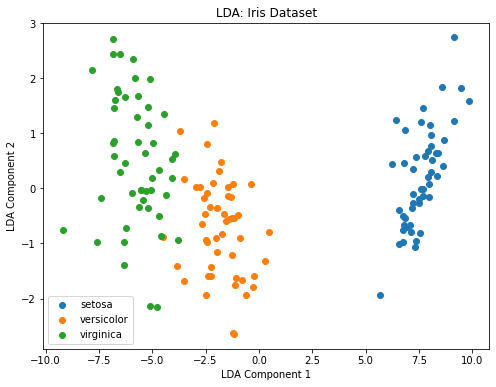

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an LDA model and fit it to the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Use the trained LDA model to predict the species on the testing data
y_pred = lda.predict(X_test)

# Calculate the accuracy of the LDA model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Fit LDA with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for the reduced data
lda_df = pd.DataFrame(data=X_lda, columns=['LDA Component 1', 'LDA Component 2'])
lda_df['Species'] = iris.target

# Create a scatterplot to visualize the LDA components
plt.figure(figsize=(8, 6))

for target in lda_df["Species"].unique():
    subset = lda_df[lda_df["Species"] == target]
    plt.scatter(subset["LDA Component 1"], subset["LDA Component 2"], label=iris.target_names[target])


plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA: Iris Dataset")
plt.legend()
plt.show()


In [34]:
# Example flower features (replace these with the actual values of the flower you want to classify)
new_flower_features = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict the species of the new flower
predicted_species = lda.predict(new_flower_features)
print(f"Predicted Species: {iris.target_names[predicted_species][0]}")


Predicted Species: setosa
